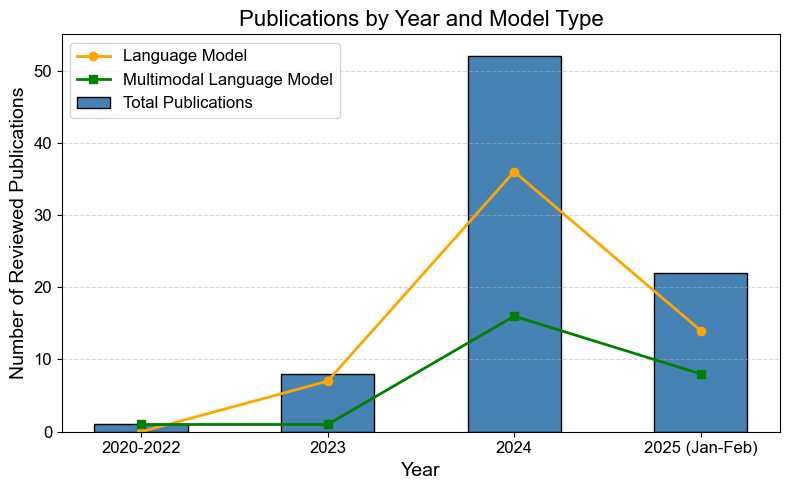

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
file_path = "Data.xlsx"  # Ensure the file is in the correct path
df = pd.read_excel(file_path)

# Define valid years and type mappings
valid_years = [2022, 2023, 2024, 2025]
type_mapping = {"LLM": "Language Model", "MLM": "Multimodal Language Model"}

# Count total publications per year
year_counts = df["Year"].value_counts().sort_index()
year_counts = year_counts[year_counts.index.isin(valid_years)]

# Count publications per year for each type
llm_counts = df[df["TYPE"] == "LLM"]["Year"].value_counts().sort_index()
mlm_counts = df[df["TYPE"] == "MLM"]["Year"].value_counts().sort_index()

# Ensure all years are present in the index (fill missing years with 0)
llm_counts = llm_counts.reindex(valid_years, fill_value=0)
mlm_counts = mlm_counts.reindex(valid_years, fill_value=0)

# Set font style to Arial
plt.rcParams["font.family"] = "Arial"

# Custom labels for X-axis
custom_labels = ["2020-2022", "2023", "2024", "2025 (Jan-Feb)"]

# Plot the bar chart
plt.figure(figsize=(8, 5))
plt.bar(year_counts.index, year_counts.values, color='steelblue', edgecolor='black', width=0.5, label="Total Publications")

# Plot LLM and MLM counts as lines
plt.plot(valid_years, llm_counts.values, color='orange', marker='o', linewidth=2, label="Language Model")
plt.plot(valid_years, mlm_counts.values, color='green', marker='s', linewidth=2, label="Multimodal Language Model")

# Formatting the plot
plt.xlabel("Year", fontsize=14)
plt.ylabel("Number of Reviewed Publications", fontsize=14)
plt.title("Publications by Year and Model Type", fontsize=16)
plt.xticks(valid_years, labels=custom_labels, fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0, 55)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend(fontsize=12)

# Show the plot
plt.tight_layout()
#plt.savefig('CountFigure.png', dpi=1000)
plt.show()


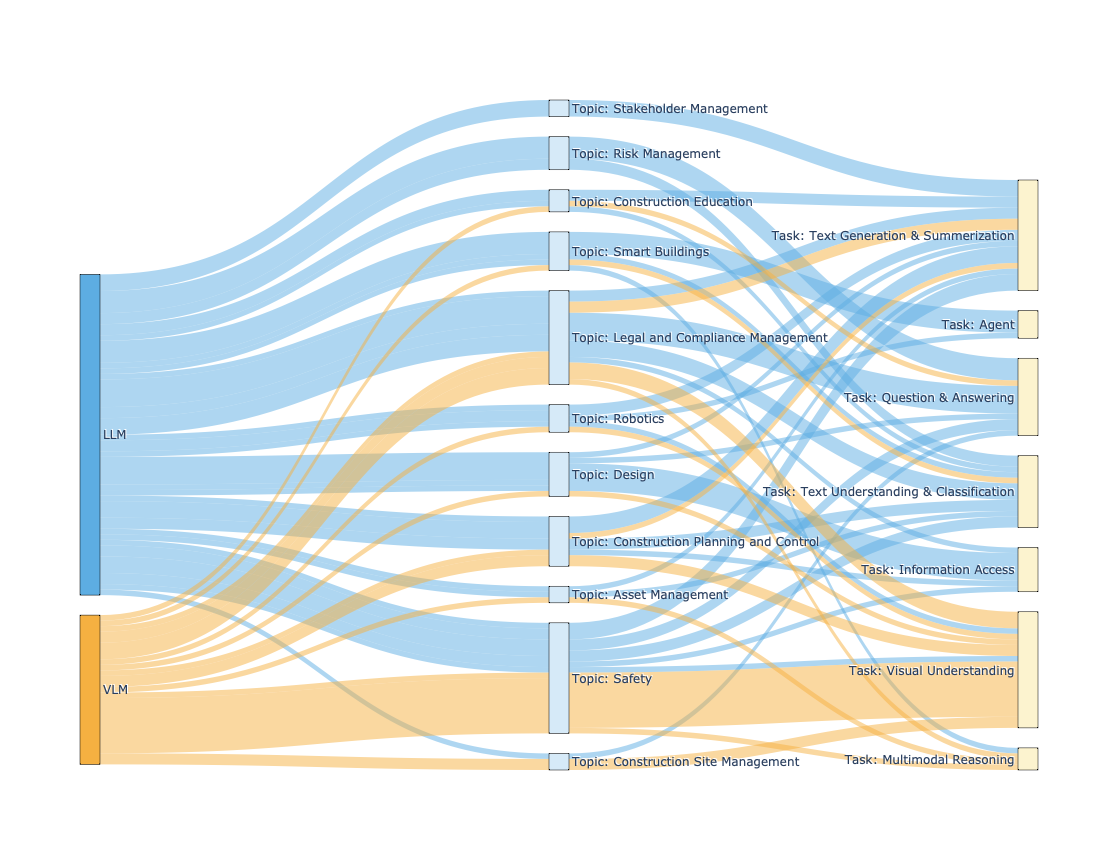

In [29]:
import pandas as pd
import plotly.graph_objects as go

# Load data
df = pd.read_excel("Topic-revision.xlsx")

# Filter low-count connections
min_count = 1
df = df.groupby(['Model', 'Topic', 'Task']).size().reset_index(name='count')
df = df[df['count'] >= min_count]

# Prefix labels
df['ModelNode'] = df['Model']
df['TopicNode'] = 'Topic: ' + df['Topic']
df['TaskNode'] = 'Task: ' + df['Task']

# Flow color based on model
df['FlowColor'] = df['Model'].map({
    'LLM': 'rgba(93, 173, 226, 0.5)',   # blue
    'VLM': 'rgba(245, 176, 65, 0.5)'    # orange
})

# Create full list of unique nodes
all_nodes = pd.unique(df['ModelNode'].tolist() + df['TopicNode'].tolist() + df['TaskNode'].tolist())
node_indices = {name: i for i, name in enumerate(all_nodes)}

# Prepare source-target-value-color lists
source, target, value, link_color = [], [], [], []

# Model → Topic
for _, row in df.iterrows():
    source.append(node_indices[row['ModelNode']])
    target.append(node_indices[row['TopicNode']])
    value.append(row['count'])
    link_color.append(row['FlowColor'])

# Topic → Task
for _, row in df.iterrows():
    source.append(node_indices[row['TopicNode']])
    target.append(node_indices[row['TaskNode']])
    value.append(row['count'])
    link_color.append(row['FlowColor'])

# Node colors (lighter)
node_colors = []
for node in all_nodes:
    if node == 'LLM':
        node_colors.append("#5DADE2")
    elif node == 'VLM':
        node_colors.append("#F5B041")
    elif node.startswith("Topic:"):
        node_colors.append("#D6EAF8")
    elif node.startswith("Task:"):
        node_colors.append("#FCF3CF")
    else:
        node_colors.append("lightgrey")

# Create Sankey
fig = go.Figure(data=[go.Sankey(
    arrangement="snap",
    node=dict(
        pad=20,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=all_nodes,
        color=node_colors
    ),
    link=dict(
        source=source,
        target=target,
        value=value,
        color=link_color
    )
)])

fig.update_layout(
    #title_text="Flow of LLM and VLM into Topics and Tasks (Full Path Color Consistency)",
    #font_size=14,
    height=850,
    width=1400
)

fig.write_image("sankey_llm_vlm_color_fixed.png", scale=2)
fig.show()


In [4]:
fig.write_image("sankey_llm_vlm.png", width=1400, height=800, scale=2)


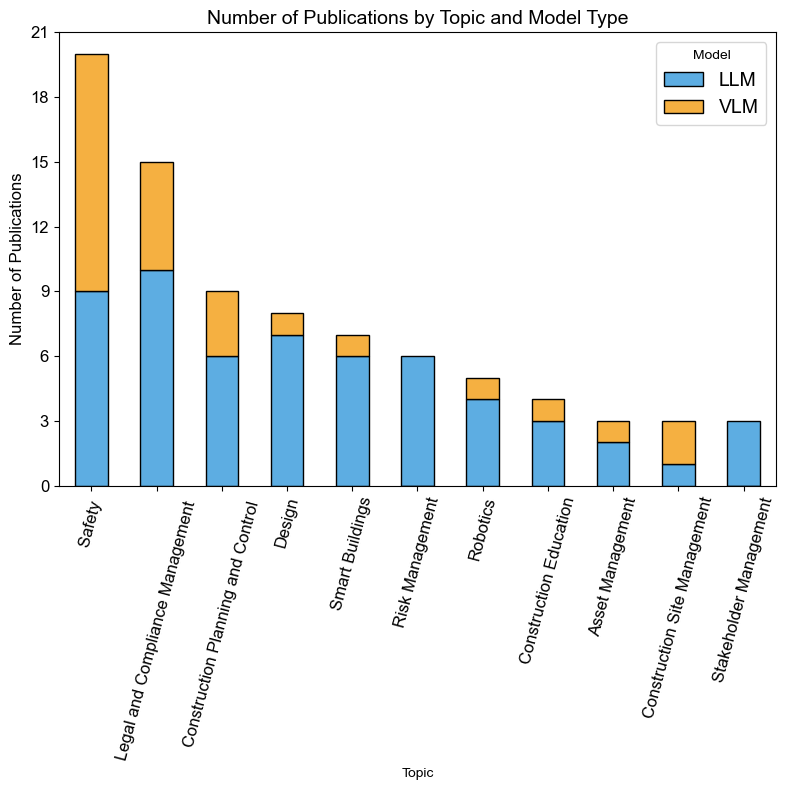

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# Load data
df = pd.read_excel("Topic-revision2.xlsx")

plt.rcParams["font.family"] = "Arial"
# Group by Topic and Model
topic_counts = df.groupby(['Topic', 'Model']).size().unstack(fill_value=0)
topic_counts['Total'] = topic_counts.sum(axis=1)
topic_counts = topic_counts.sort_values(by='Total', ascending=False)

# Create a figure and axis manually with desired size
fig, ax = plt.subplots(figsize=(8, 8))  # taller figure

# Plot on that axis
topic_counts[['LLM', 'VLM']].plot(
    kind='bar',
    stacked=True,
    color=['#5DADE2', '#F5B041'],
    edgecolor='black',
    ax=ax  # <--- this is the key
)

# Formatting
ax.set_title("Number of Publications by Topic and Model Type", fontsize=14)

ax.set_ylabel("Number of Publications", fontsize=12)
ax.tick_params(axis='x', rotation=75, labelsize=12)
ax.tick_params(axis='y', labelsize=12)
# Y-axis only uses integers
ax.yaxis.set_major_locator(mtick.MaxNLocator(integer=True))
ax.legend(title='Model',fontsize=14)
plt.tight_layout()

# Save and show
plt.savefig("bar_topic_model_split_taller_fixed.png", dpi=800)
plt.show()


/var/folders/f9/23c1jfhx0435n0xc7vtjd6g80000gp/T/ipykernel_46886/3325452294.py:59: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.

/Users/aerfani/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning:

Glyph 8208 (\N{HYPHEN}) missing from current font.



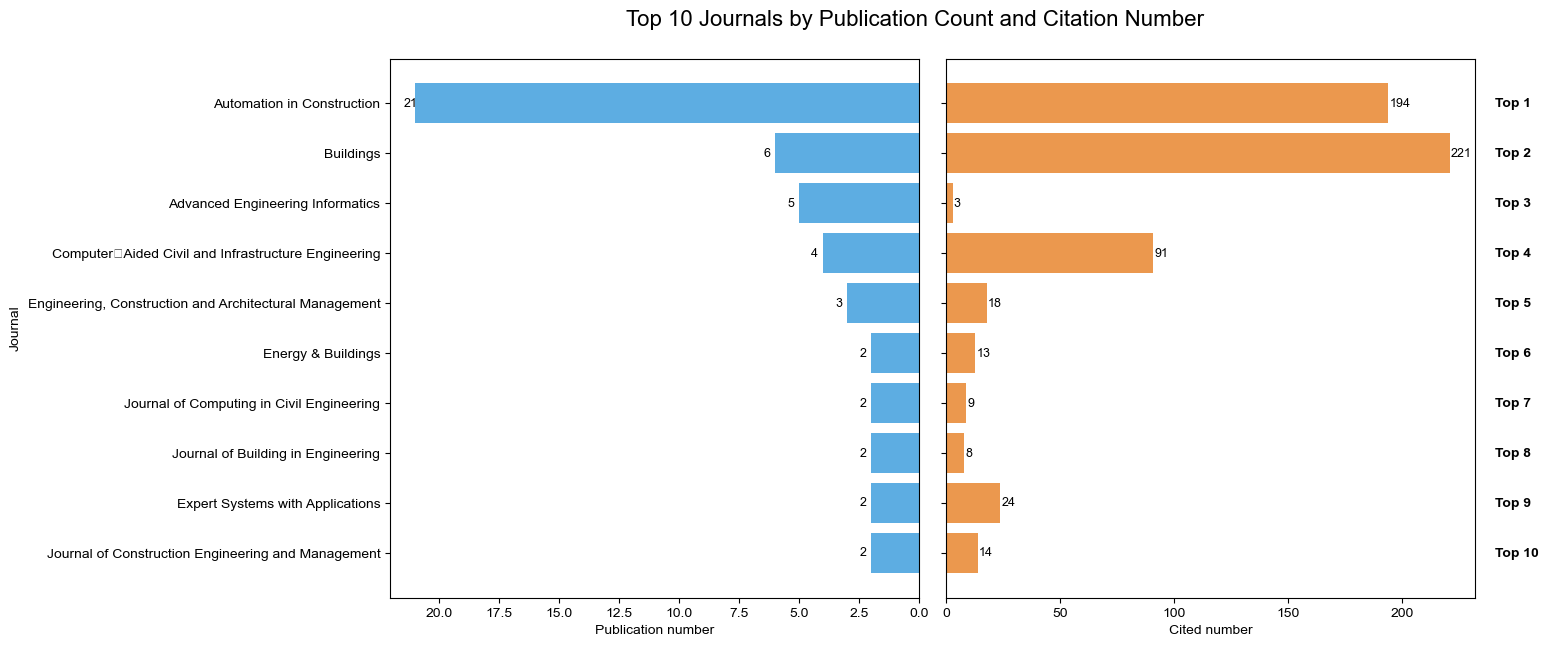

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_excel("Journals.xlsx")

# Count publications and citations per journal
paper_counts = df['Source'].value_counts().reset_index()
paper_counts.columns = ['Source', 'PublicationCount']

citation_sums = df.groupby('Source')['Citation'].sum().reset_index()
citation_sums.columns = ['Source', 'CitationCount']

# Merge and get top 10 by publication count
summary = pd.merge(paper_counts, citation_sums, on='Source')
top10 = summary.sort_values(by='PublicationCount', ascending=False).head(10).reset_index(drop=True)

# Reverse for visual (top 1 at top)
top10 = top10[::-1].reset_index(drop=True)
journals = top10['Source']
y_pos = list(range(len(journals)))

plt.rcParams["font.family"] = "Arial"

# Plot side-by-side mirrored bars
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7), gridspec_kw={'wspace': 0.05})

# Plot publication counts (left)
bars1 = ax1.barh(y_pos, top10['PublicationCount'], color='#5DADE2')
ax1.set_yticks(y_pos)
ax1.set_yticklabels(journals, fontsize=10)
ax1.invert_xaxis()
ax1.set_xlabel("Publication number")
ax1.set_ylabel("Journal")

# Labels outside bars (left)
for i, bar in enumerate(bars1):
    ax1.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2,
             f"{int(bar.get_width())}", ha='left', va='center', color='black', fontsize=9)

# Plot citation counts (right)
bars2 = ax2.barh(y_pos, top10['CitationCount'], color='#EB984E')
ax2.set_yticks(y_pos)
ax2.set_yticklabels([])  # Remove duplicate labels
ax2.set_xlabel("Cited number")

# Labels outside bars (right)
for i, bar in enumerate(bars2):
    ax2.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2,
             f"{int(bar.get_width())}", ha='left', va='center', color='black', fontsize=9)

# Add "Top 1" - "Top 10" ranking on right side only (optional)
for i in range(len(y_pos)):
    ax2.text(top10['CitationCount'].max() + 20, y_pos[i],
             f"Top {len(y_pos) - i}", va='center', ha='left', fontsize=10, fontweight='bold')

# Final adjustments
plt.suptitle("Top 10 Journals by Publication Count and Citation Number", fontsize=16, y=0.95)
plt.tight_layout()
#plt.savefig("top10_journals_dual_bar_updated.png", dpi=300)
plt.show()


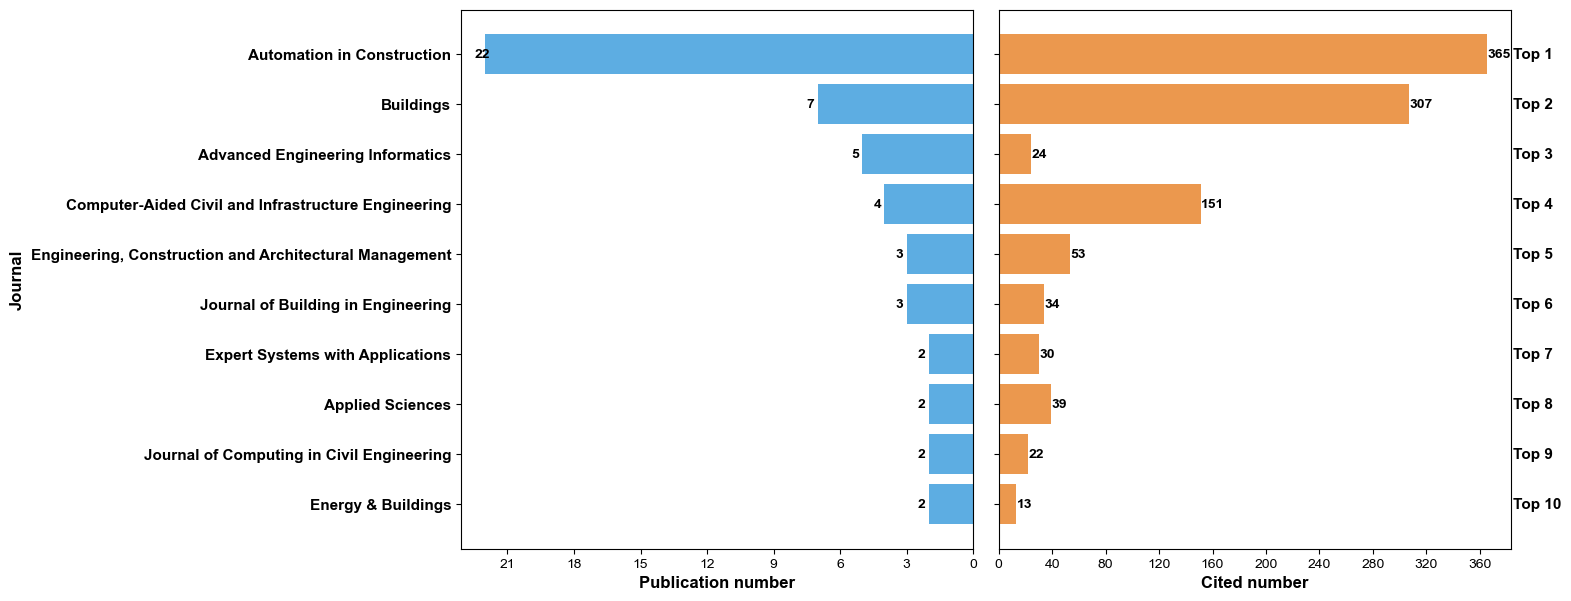

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Load data
df = pd.read_excel("Journal-Figure.xlsx")
df['Source'] = df['Source'].str.replace('\u2010', '-', regex=True)  # Non-breaking hyphen to normal dash

# Count publications and citations per journal
paper_counts = df['Source'].value_counts().reset_index()
paper_counts.columns = ['Source', 'PublicationCount']

citation_sums = df.groupby('Source')['Citation'].sum().reset_index()
citation_sums.columns = ['Source', 'CitationCount']

# Merge and get top 10 by publication count
summary = pd.merge(paper_counts, citation_sums, on='Source')
top10 = summary.sort_values(by='PublicationCount', ascending=False).head(10).reset_index(drop=True)

# Reverse for visual (Top 1 at top)
top10 = top10[::-1].reset_index(drop=True)
journals = top10['Source']
y_pos = list(range(len(journals)))

# Plot side-by-side mirrored bars
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7), gridspec_kw={'wspace': 0.05})

# Set global font to Arial
#plt.rcParams["font.family"] = "Arial"

# --- Left side: Publication Count ---
bars1 = ax1.barh(y_pos, top10['PublicationCount'], color='#5DADE2')
ax1.set_yticks(y_pos)
ax1.set_yticklabels(journals, fontsize=11, fontweight='bold')
ax1.invert_xaxis()
ax1.set_xlabel("Publication number", fontsize=12, fontweight='bold')
ax1.set_ylabel("Journal", fontsize=12, fontweight='bold')
ax1.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

# Bar labels (left, outside)
for i, bar in enumerate(bars1):
    ax1.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2,
             f"{int(bar.get_width())}", ha='left', va='center', color='black',
             fontsize=10, fontweight='bold')

# --- Right side: Citation Count ---
bars2 = ax2.barh(y_pos, top10['CitationCount'], color='#EB984E')
ax2.set_yticks(y_pos)
ax2.set_yticklabels([])  # Remove y-ticks on right side
ax2.set_xlabel("Cited number", fontsize=12, fontweight='bold')
ax2.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

# Bar labels (right, outside)
for i, bar in enumerate(bars2):
    ax2.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2,
             f"{int(bar.get_width())}", ha='left', va='center', color='black',
             fontsize=10, fontweight='bold')

# Add "Top 1" to "Top 10" ranking only on the right side
for i in range(len(y_pos)):
    ax2.text(top10['CitationCount'].max() + 20, y_pos[i],
             f"Top {len(y_pos) - i}", va='center', ha='left',
             fontsize=11, fontweight='bold')

# Final adjustments
plt.subplots_adjust(left=0.20, right=0.95)  # more space for y-axis labels
#plt.savefig("top10_journals_mirrored_final_polished.png", dpi=1000, bbox_inches='tight')
plt.show()



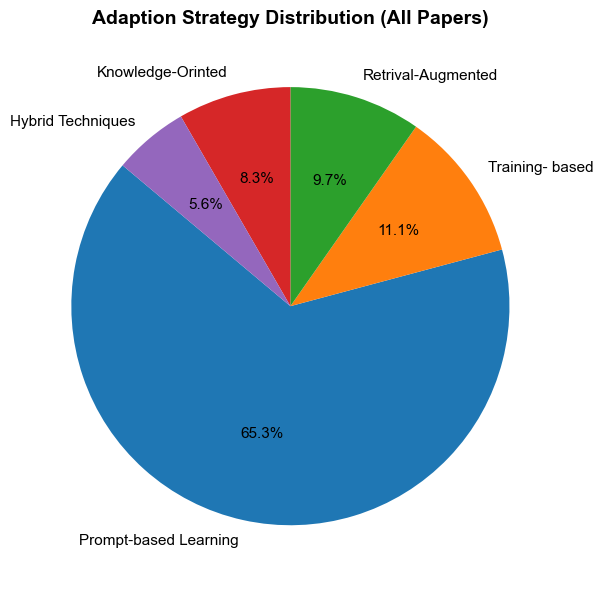

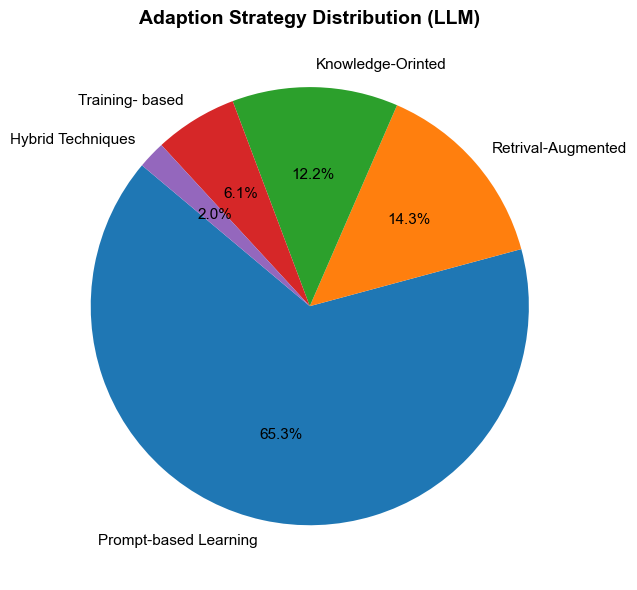

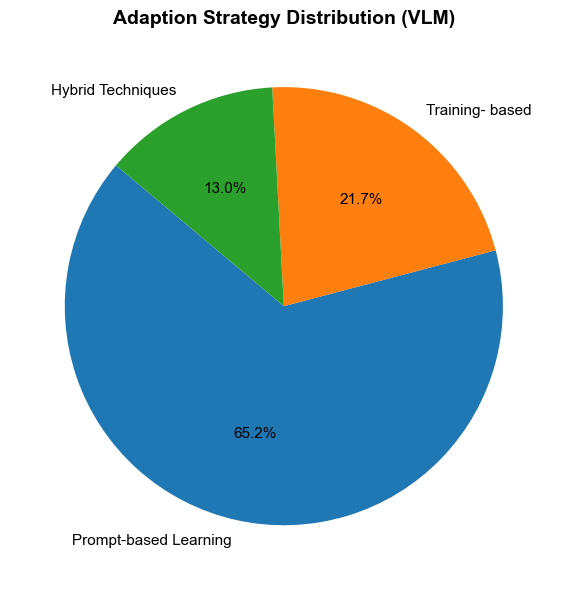

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_excel("Data.xlsx")

# Set font to Arial for consistency (optional)
plt.rcParams['font.family'] = 'Arial'

def plot_pie(data, title, filename):
    counts = data['Adaption Strategy'].value_counts()
    percentages = counts / counts.sum() * 100

    fig, ax = plt.subplots(figsize=(8, 6))
    wedges, texts, autotexts = ax.pie(
        percentages,
        labels=percentages.index,
        autopct='%1.1f%%',
        startangle=140,
        textprops={'fontsize': 11}
    )
    ax.set_title(title, fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.savefig(filename, dpi=300)
    plt.show()

# Pie chart for ALL papers
plot_pie(df, "Adaption Strategy Distribution (All Papers)", "adaption_strategy_all.png")

# Pie chart for LLM papers
plot_pie(df[df['TYPE'] == 'LLM'], "Adaption Strategy Distribution (LLM)", "adaption_strategy_llm.png")

# Pie chart for VLM (MLM-labeled) papers
plot_pie(df[df['TYPE'] == 'MLM'], "Adaption Strategy Distribution (VLM)", "adaption_strategy_vlm.png")


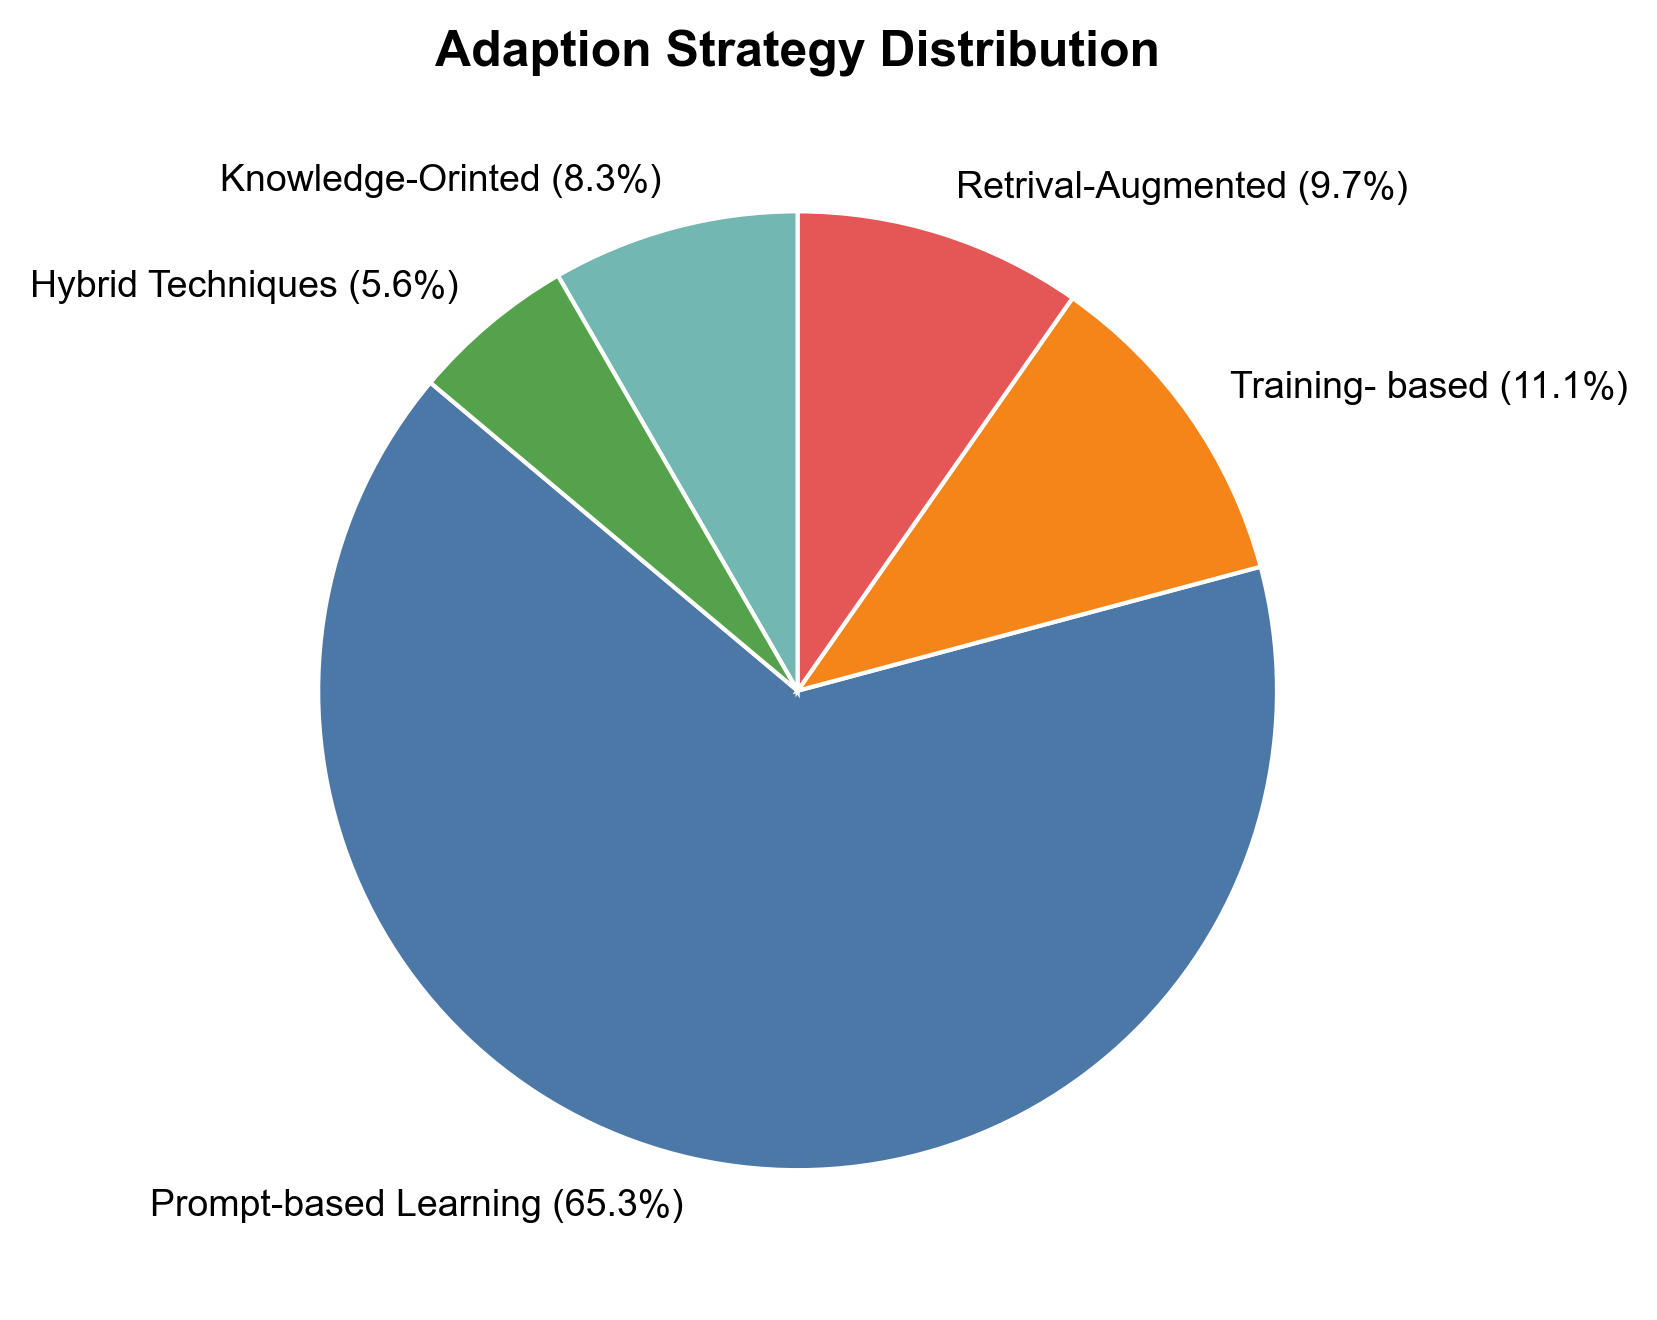

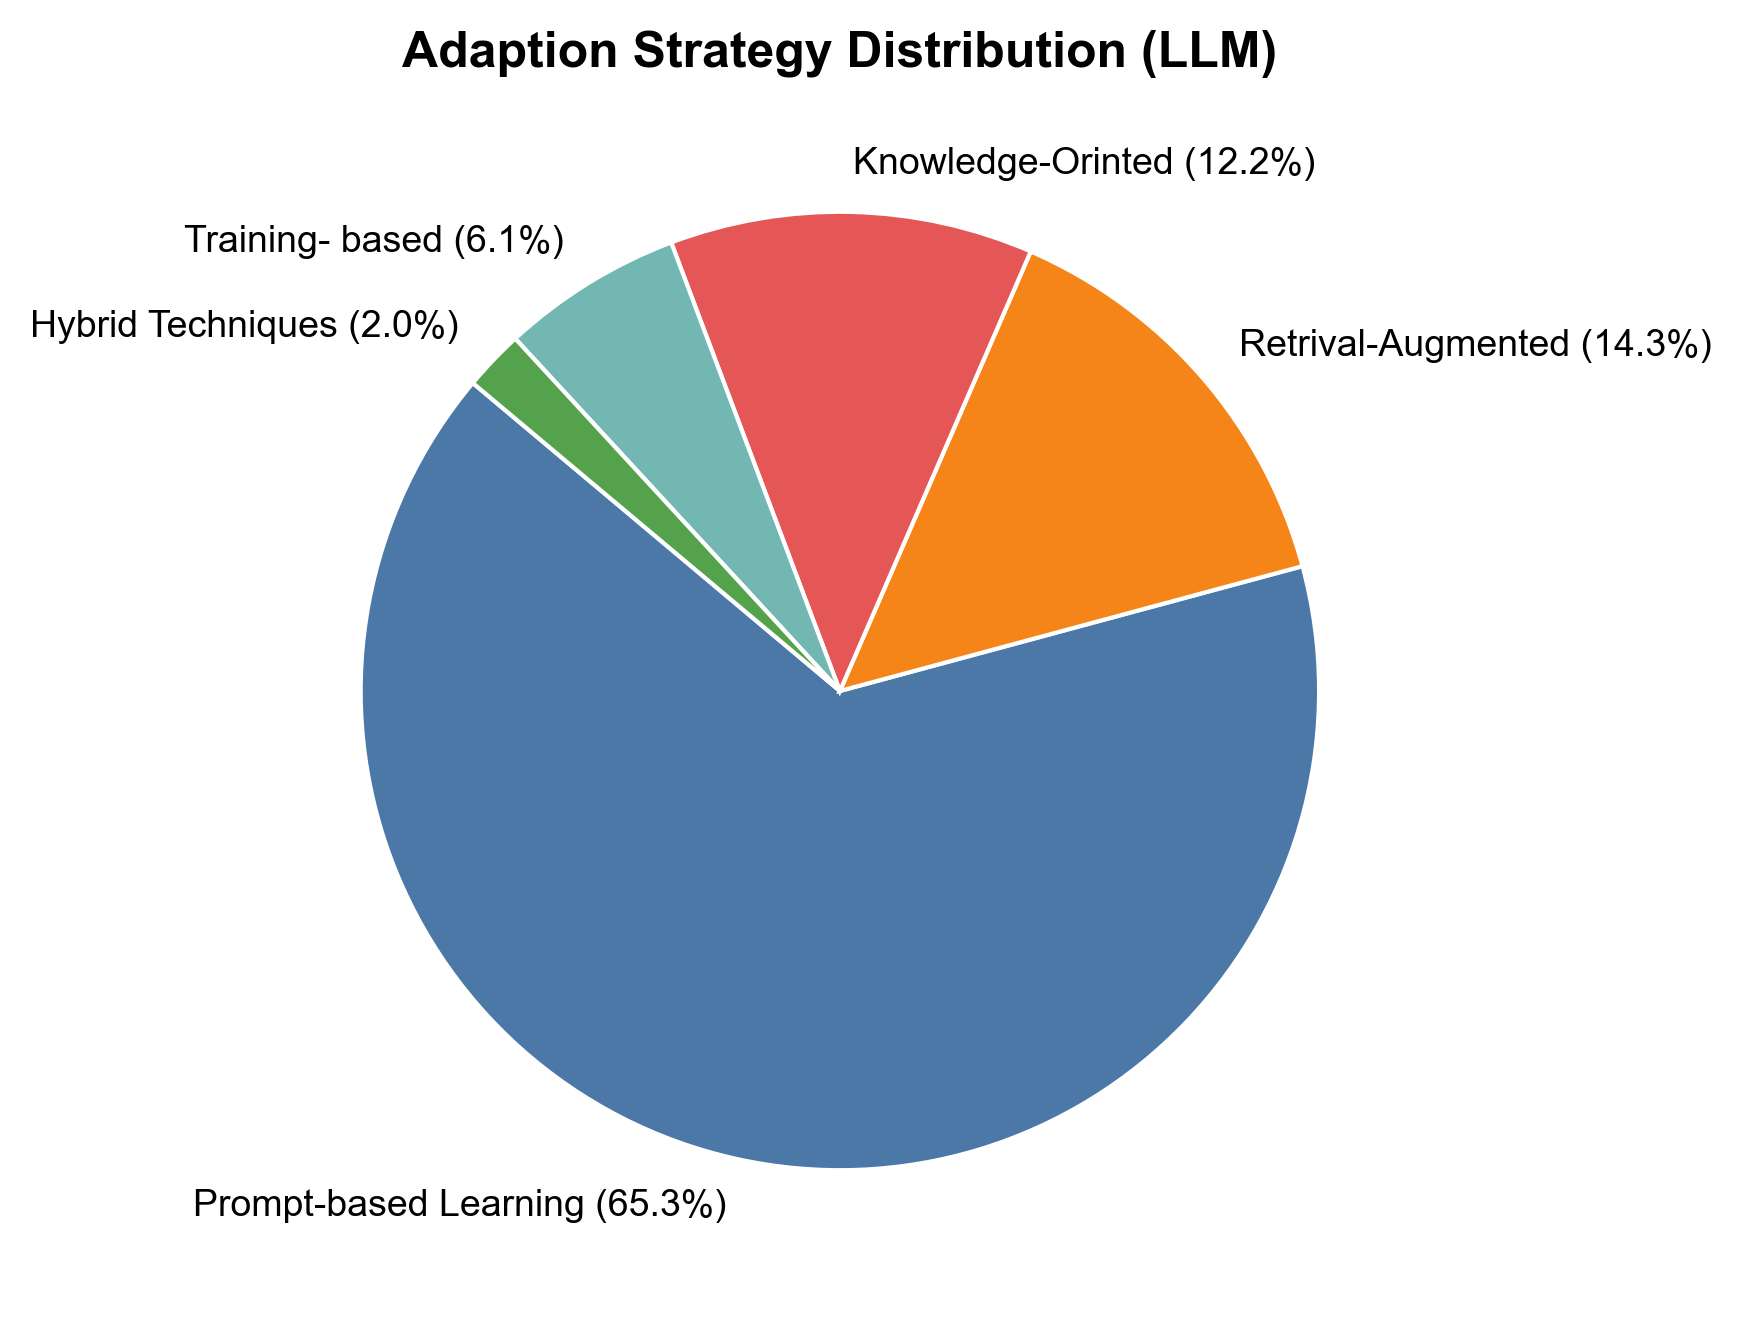

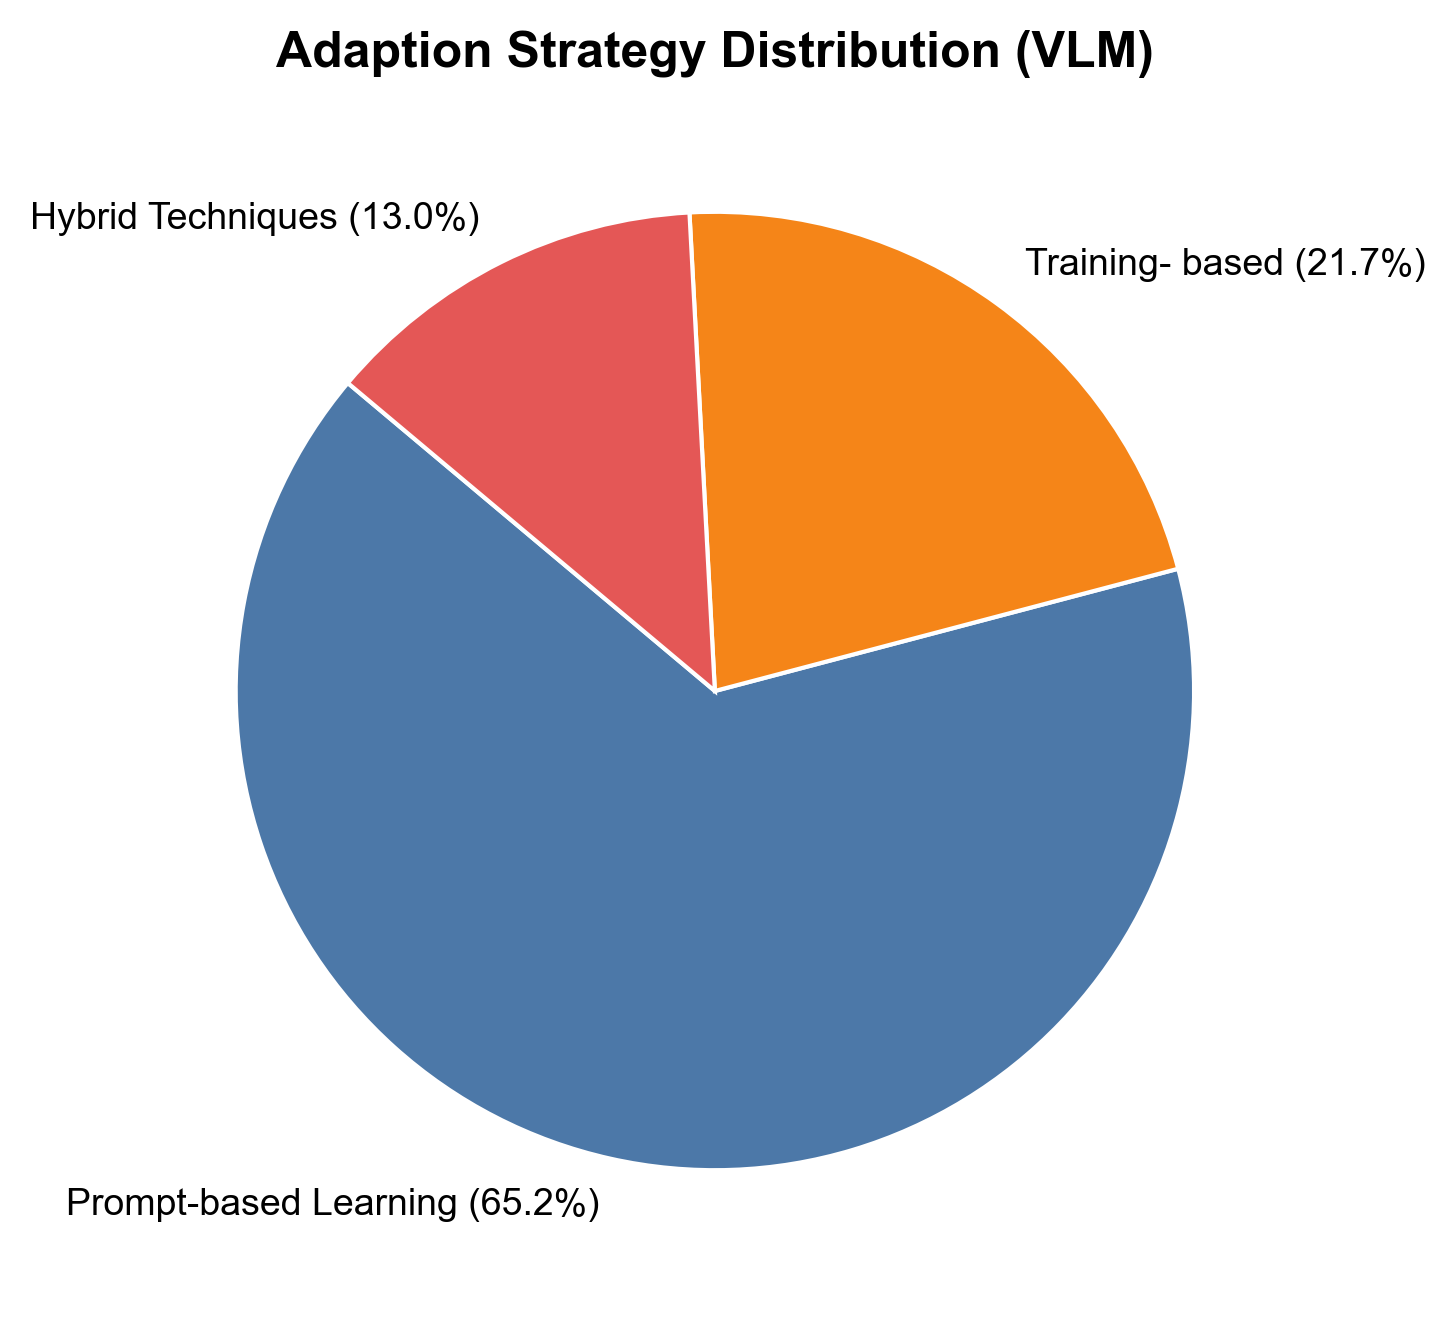

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_excel("Data.xlsx")

# Function to create a polished, compact pie chart
def polished_pie(data, title, filename):
    counts = data['Adaption Strategy'].value_counts()
    percentages = counts / counts.sum() * 100
    labels = [f"{label} ({percent:.1f}%)" for label, percent in zip(counts.index, percentages)]

    # Custom muted color palette
    colors = ['#4C78A8', '#F58518', '#E45756', '#72B7B2', '#54A24B', '#B279A2', '#FF9DA6']

    fig, ax = plt.subplots(figsize=(5.5, 4.5), dpi=300)
    wedges, texts = ax.pie(
        counts,
        labels=labels,
        colors=colors[:len(counts)],
        startangle=140,
        wedgeprops={'edgecolor': 'white'}
    )

    # Styling
    plt.setp(texts, size=9, fontname='Arial')
    ax.set_title(title, fontsize=12, fontweight='bold', fontname='Arial')
    plt.tight_layout()
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.show()

# Pie for All Papers
polished_pie(df, "Adaption Strategy Distribution", "adaption_strategy_all_polished.png")

# Pie for LLM papers
polished_pie(df[df['TYPE'] == 'LLM'], "Adaption Strategy Distribution (LLM)", "adaption_strategy_llm_polished.png")

# Pie for VLM (MLM-labeled) papers
polished_pie(df[df['TYPE'] == 'MLM'], "Adaption Strategy Distribution (VLM)", "adaption_strategy_vlm_polished.png")


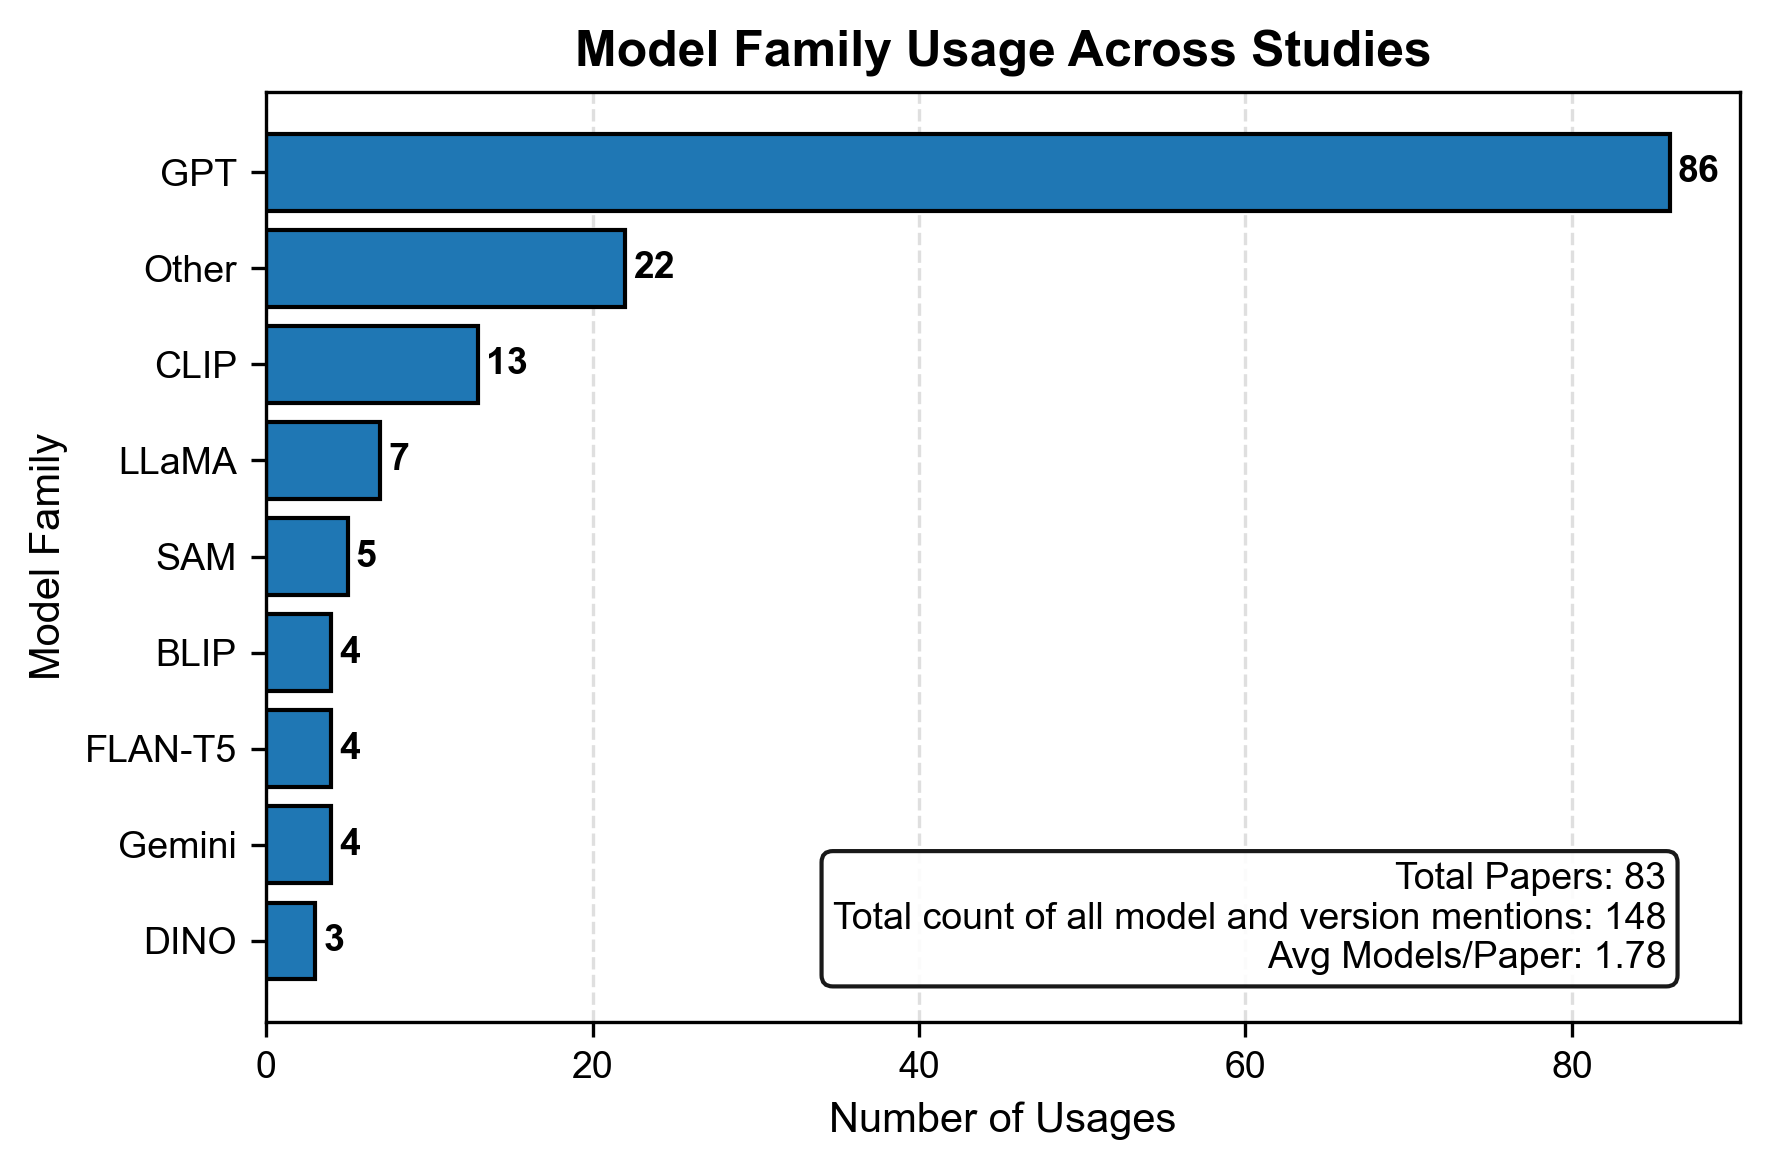

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_excel("Data-revision.xlsx")

# Step 1: Split and explode the "Model used" column
df['Model used'] = df['Model used'].fillna('').astype(str)
df['Model used'] = df['Model used'].str.split(',')
df = df.explode('Model used')
df['Model used'] = df['Model used'].str.strip()

# Step 2: Map each model to a family
def map_model_family(model_name):
    model_name = model_name.lower()
    if 'gpt' in model_name:
        return 'GPT'
    elif 'llama' in model_name:
        return 'LLaMA'
    elif 'clip' in model_name:
        return 'CLIP'
    elif 'blip' in model_name:
        return 'BLIP'
    elif 'gemini' in model_name:
        return 'Gemini'
    elif 't5' in model_name:
        return 'FLAN-T5'
    elif 'sam' in model_name:
        return 'SAM'
    elif 'dino' in model_name:
        return 'DINO'
    else:
        return 'Other'

df['Model Group'] = df['Model used'].apply(map_model_family)

# Count occurrences by model group
model_counts = df['Model Group'].value_counts().sort_values(ascending=True)

# Compute summary statistics
unique_papers = df['Title'].nunique()  
total_usages = len(df)
avg_models_per_paper = total_usages / unique_papers

# Plot
fig, ax = plt.subplots(figsize=(6, 4), dpi=300)
bars = ax.barh(model_counts.index, model_counts.values, color='#1f77b4', edgecolor='black')

# Add bar labels
for bar in bars:
    width = bar.get_width()
    ax.text(width + 0.5, bar.get_y() + bar.get_height() / 2,
            f"{int(width)}", va='center', ha='left',
            fontsize=9, fontweight='bold', fontname='Arial')

# Style
ax.set_title("Model Family Usage Across Studies", fontsize=12, fontweight='bold', fontname='Arial')
ax.set_xlabel("Number of Usages", fontsize=10, fontname='Arial')
ax.set_ylabel("Model Family", fontsize=10, fontname='Arial')
ax.tick_params(axis='x', labelsize=9)
ax.tick_params(axis='y', labelsize=9)
ax.set_axisbelow(True)
ax.grid(axis='x', linestyle='--', alpha=0.4)

# Add summary box
summary_text = (
    f"Total Papers: {unique_papers}\n"
    f"Total count of all model and version mentions: {total_usages}\n"
    f"Avg Models/Paper: {avg_models_per_paper:.2f}"
)
props = dict(boxstyle='round', facecolor='white', edgecolor='black', alpha=0.9)
ax.text(0.95, 0.05, summary_text, transform=ax.transAxes,
        fontsize=9, verticalalignment='bottom', horizontalalignment='right',
        bbox=props, fontname='Arial')

plt.tight_layout()
plt.savefig("model_family_bar_chart_with_summary.png", bbox_inches='tight', dpi=800)
plt.show()


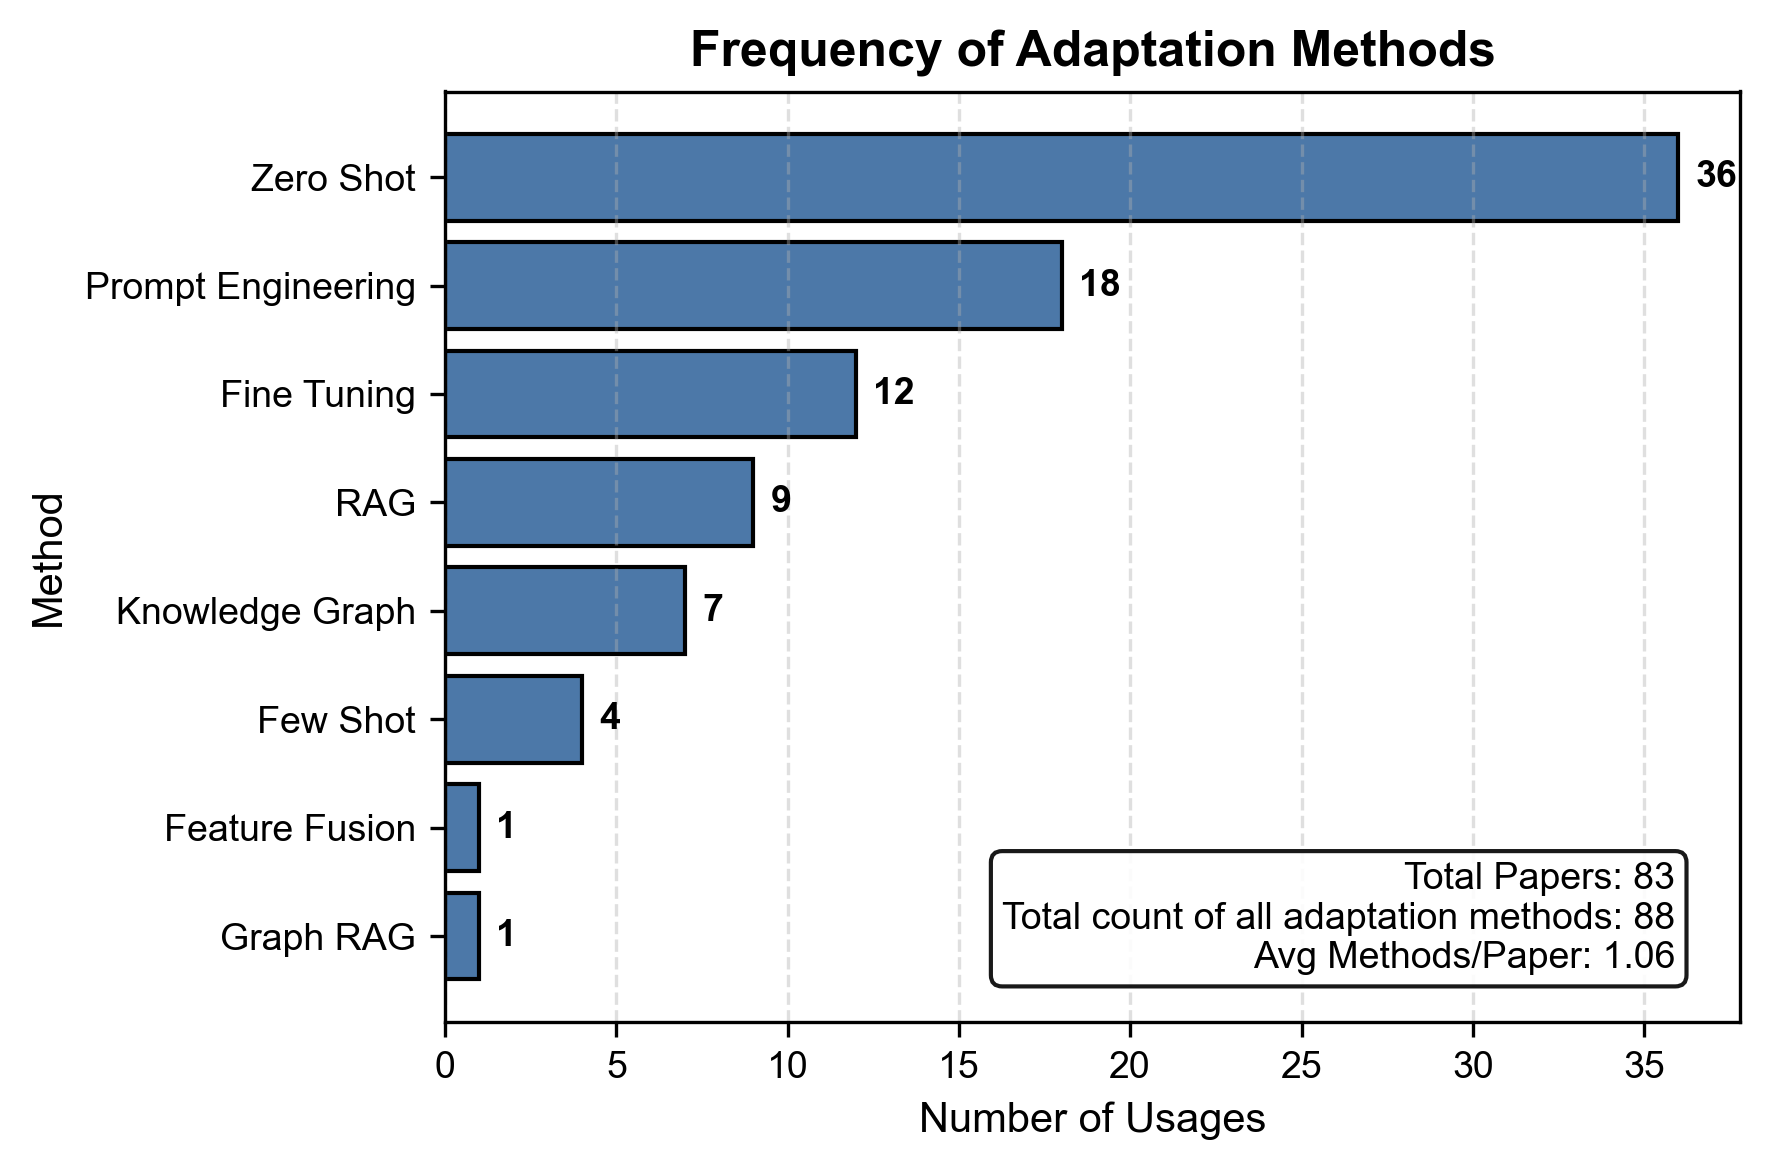

In [54]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_excel("Data-revision.xlsx")

# Expand the "Method" column: split by comma and explode
df['Method'] = df['Method'].fillna('').astype(str)
df['Method'] = df['Method'].str.split(',')
df = df.explode('Method')

# Clean and trim whitespace
df['Method'] = df['Method'].str.strip()

# Replace abbreviations
df['Method'] = df['Method'].replace({'KG': 'Knowledge Graph'})

# Compute summary statistics
unique_papers = df['Title'].nunique() 

# Count frequencies
method_counts = df['Method'].value_counts().sort_values(ascending=True)
Total_methods= method_counts.sum()
avg_models_per_paper= Total_methods/unique_papers

# Plot
fig, ax = plt.subplots(figsize=(6, 4), dpi=300)
bars = plt.barh(method_counts.index, method_counts.values, color='#4C78A8', edgecolor='black')

# Label bars
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.5, bar.get_y() + bar.get_height()/2,
             str(int(width)), va='center', ha='left',
             fontsize=9, fontweight='bold', fontname='Arial')
# Styling
plt.title("Frequency of Adaptation Methods", fontsize=12, fontweight='bold', fontname='Arial')
plt.xlabel("Number of Usages", fontsize=10, fontname='Arial')
plt.ylabel("Method", fontsize=10, fontname='Arial')
plt.xticks(fontsize=9, fontname='Arial')
plt.yticks(fontsize=9, fontname='Arial')
plt.tight_layout()
ax.grid(axis='x', linestyle='--', alpha=0.4)


# Add summary box
summary_text = (
    f"Total Papers: {unique_papers}\n"
    f"Total count of all adaptation methods: {Total_methods}\n"
    f"Avg Methods/Paper: {avg_models_per_paper:.2f}"
)
props = dict(boxstyle='round', facecolor='white', edgecolor='black', alpha=0.9)
ax.text(0.95, 0.05, summary_text, transform=ax.transAxes,
        fontsize=9, verticalalignment='bottom', horizontalalignment='right',
        bbox=props, fontname='Arial')

# Save and show
plt.savefig("method_frequency_cleaned_bar.png", bbox_inches='tight', dpi=900)
plt.show()
